# Identifying Top Complaint Type

In [1]:
## Download data from the following link: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

In [1]:
# Importing the data 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/anthonymoubarak/Desktop/311_Service_Requests_from_2010_to_Present_min (1).csv')

# Dropping the columns of no use 

df = df.drop(columns = ['Address Type' , 'Closed Date' , 'Unique Key' , 'Resolution Description'])
df.head()

,Unnamed: 0,Created Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Borough,Latitude,Longitude
0,0,02/02/2020 06:09:17 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,NEW YORK,Open,MANHATTAN,40.765132,-73.988993
1,1,02/02/2020 02:15:24 PM,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,BROOKLYN,Open,BROOKLYN,40.618484,-73.992673
2,2,02/02/2020 02:27:41 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,Jackson Heights,Open,QUEENS,40.750269,-73.879432
3,3,02/02/2020 12:13:18 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,BRONX,Open,BRONX,40.853773,-73.881558
4,4,02/02/2020 01:59:44 PM,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,BROOKLYN,Open,BROOKLYN,40.629745,-74.030533


In [2]:
# Checking the number of complaints for each complaint type

df_complaints = df['Complaint Type'].value_counts()
df_complaints = df_complaints.sort_values(ascending = True )
Total_complaints = df_complaints.sum()

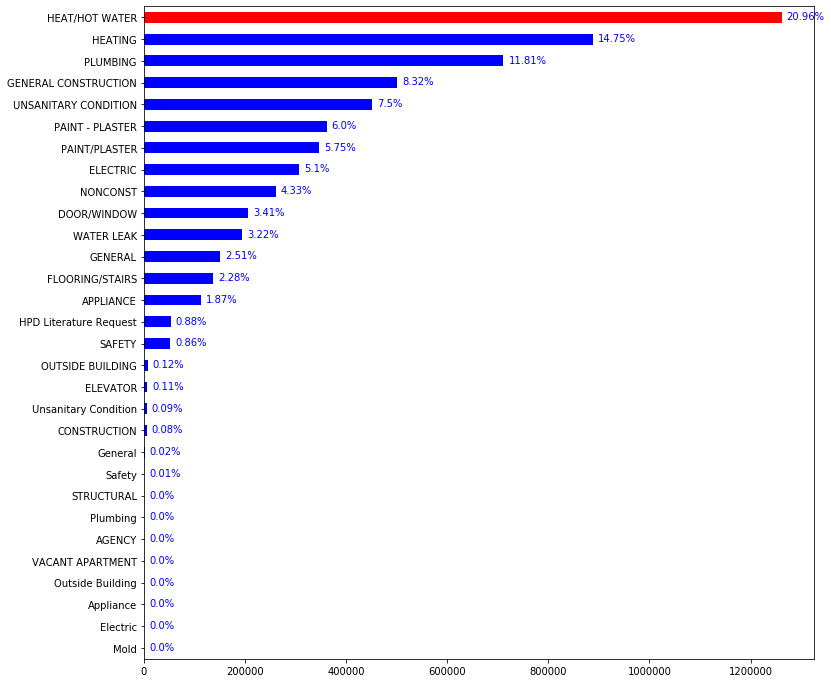

In [3]:
# Create a bar plot that visualizes the total number of complaints for each complaint type


# Set colors
colors = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
          'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
          'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue' , 'blue', 'blue',
         'blue','blue','blue','blue','red']
df_complaints.plot(kind = 'barh' , figsize = (12,12) , color = colors)

# Set text label to show the percentage of each complaint
for index, value in enumerate(df_complaints):
    label =  '{}%'.format(round((value/Total_complaints)*100, 2)) 
    plt.annotate(label, xy=(value + 10000, index-0.1), color='blue')

### The top 4 complaints which account for more than 50% of the total complaints are Heat/Hot water conditions, Heating, Plumbing, and General Construction.

# Identifying bouroughs, zip codes, and streets where the identified top complaints are common

In [4]:
# I will filter the dataframe to only include the Heat/Hot water complaint, which is the top complaint 
# identified earlier.


df_top_complaint = df[df['Complaint Type'] == 'HEAT/HOT WATER']

df_top_complaint

,Unnamed: 0,Created Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Borough,Latitude,Longitude
0,0,02/02/2020 06:09:17 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,NEW YORK,Open,MANHATTAN,40.765132,-73.988993
2,2,02/02/2020 02:27:41 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,Jackson Heights,Open,QUEENS,40.750269,-73.879432
3,3,02/02/2020 12:13:18 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,BRONX,Open,BRONX,40.853773,-73.881558
5,5,02/02/2020 07:52:08 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,BRONX,Open,BRONX,40.831381,-73.915218
7,7,02/02/2020 09:00:54 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,37-20 81 STREET,81 STREET,Jackson Heights,Open,QUEENS,40.749320,-73.885190
...,...,...,...,...,...,...,...,...,...,...,...,...
6019836,6019836,10/15/2019 06:43:56 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029.0,327 EAST 108 STREET,EAST 108 STREET,NEW YORK,Closed,MANHATTAN,40.791359,-73.940184
6019838,6019838,10/15/2019 10:35:45 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10029.0,327 EAST 108 STREET,EAST 108 STREET,NEW YORK,Closed,MANHATTAN,40.791359,-73.940184
6019839,6019839,10/15/2019 06:09:28 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10461.0,3555 BRUCKNER BOULEVARD,BRUCKNER BOULEVARD,BRONX,Closed,BRONX,40.847809,-73.827481
6019840,6019840,10/15/2019 10:54:45 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10034.0,165 SHERMAN AVENUE,SHERMAN AVENUE,NEW YORK,Closed,MANHATTAN,40.864764,-73.922764


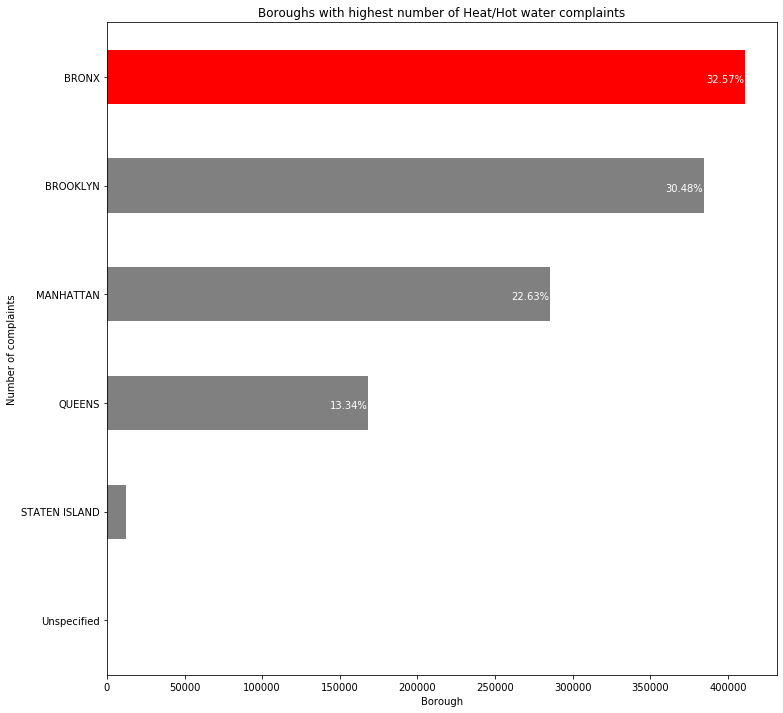

In [5]:
# Create a bar plot that visualizes the boroughs with the most heat/hot water complaints 



# Set bar color scheme
colors1 = ['red', 'grey', 'grey', 'grey', 'grey']



x = df_top_complaint['Borough'].value_counts().sort_values(ascending = True)
total = x.sum()
x.plot(kind = 'barh' , figsize = (12,12), color = colors1)
plt.xlabel('Borough')
plt.ylabel('Number of complaints')
plt.title('Boroughs with highest number of Heat/Hot water complaints')

# Set text label to show the percentage of each borough
for index, value in enumerate(x):
    label =  '{}%'.format(round((value/total)*100, 2)) 
    plt.annotate(label, xy=(value - 25000, index- 0.05), color='white')

Text(0.5, 1.0, 'Total number of complaints per zip code')

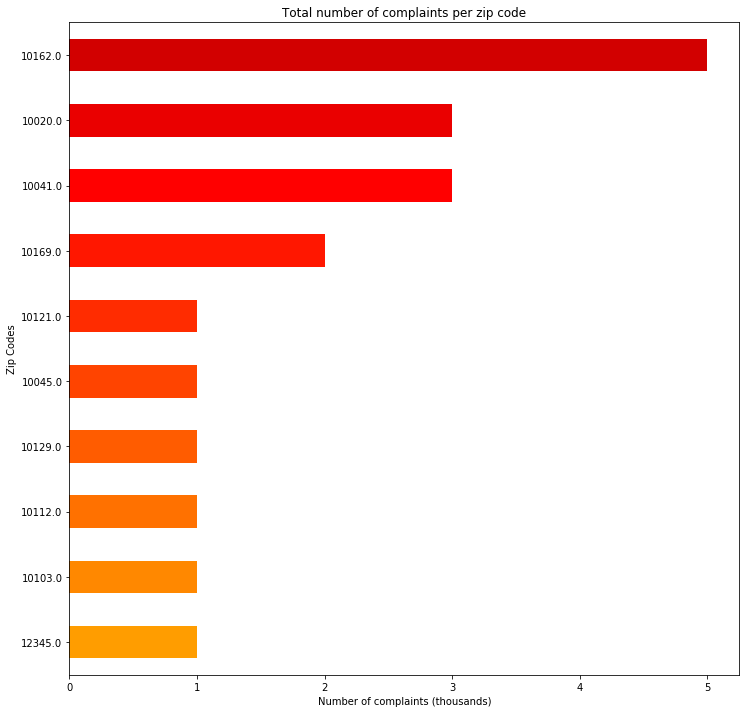

In [6]:
# Next, it is time to perform the same analysis on the zip codes 

colors2= plt.cm.hot(np.linspace(0.6, 0.3, 10))
zip_codes = df_top_complaint['Incident Zip'].value_counts().sort_values(ascending = True).head(10)
zip_codes.plot(kind = 'barh' , figsize = (12,12) , color = colors2)
plt.xlabel('Number of complaints (thousands)')
plt.ylabel('Zip Codes')
plt.title('Total number of complaints per zip code')


Text(0, 0.5, 'Street Name')

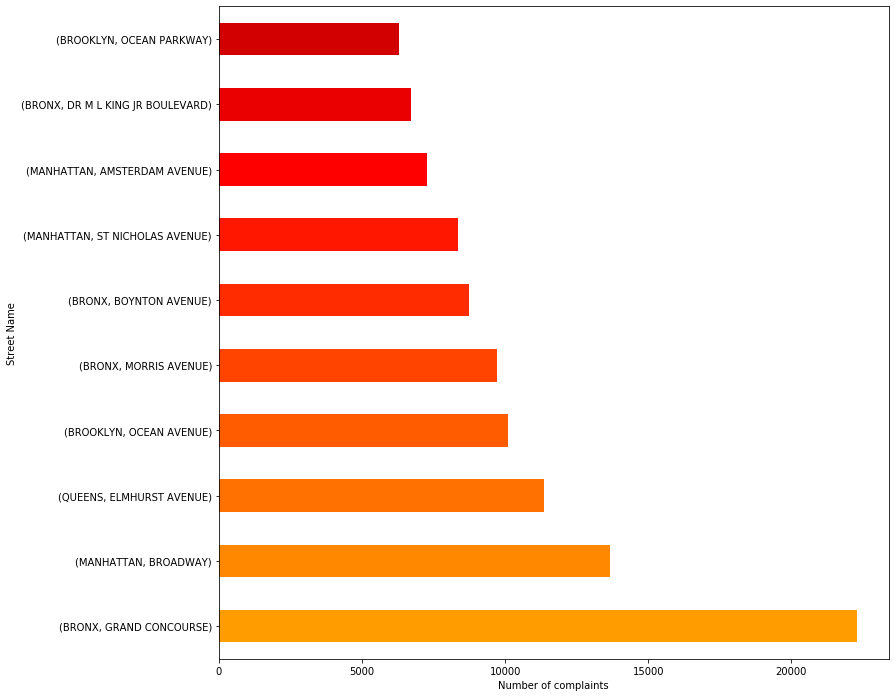

In [7]:
# Same analysis for street 

street_name = df_top_complaint.groupby(['Borough'])
street_name = street_name['Street Name'].value_counts().sort_values(ascending = False).head(10)

street_name.plot(kind = 'barh' , figsize = (12,12), color = colors2)

plt.xlabel('Number of complaints')
plt.ylabel('Street Name')

### Based on the analysis i conducted, we can conclude the following:
### Heat/Hot water complaints are most common in:

## Boroughs:

### 1) Bronx
### 2) Brooklyn
### 3) Manhattan


## Zip Codes:

### 1) 10162
### 2) 10020
### 3) 10041
### 4) 10169
### 5) 10121


## Streets:

### 1) Grand Concourse
### 2) Broadway
### 3) Elmhurst Avenue
### 4) Ocean Avenue
### 5) Morris Avenue

# Relationship between top complaint type and housing characteristics

In [8]:
# For simplicity, we will focus on bronx, since it is the borough where this complaint is moslty 


df_top_complaint = df_top_complaint[df_top_complaint['Borough'] == 'BRONX']


# It is time to import the dataset that has the housing characterics of all houses in bronx
# using columns that are recommended by the problem set

columns_used = ['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1']

bronx_housing = pd.read_csv('/Users/anthonymoubarak/Desktop/BX_18v1.csv' , usecols = columns_used)
bronx_housing.head()

,Lot,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,1,122 BRUCKNER BOULEVARD,15000,0,0,0,0,1,0.0,200.0,0.0,0,0,0.00,6.02,5.0,6.5
1,4,126 BRUCKNER BOULEVARD,13770,752,0,272,0,2,1.0,100.0,16.0,1931,1994,0.05,6.02,5.0,6.5
2,10,138 BRUCKNER BOULEVARD,35000,39375,0,0,0,1,2.0,200.0,200.0,1931,0,1.13,6.02,5.0,6.5
3,17,144 BRUCKNER BOULEVARD,2500,12500,12500,0,0,1,5.0,100.0,85.0,1931,2001,5.00,6.02,5.0,6.5
4,18,148 BRUCKNER BOULEVARD,1875,8595,6876,0,1719,1,5.0,75.0,70.0,1920,2009,4.58,6.02,5.0,6.5


In [9]:
# Since the features in the PLUTO data set are continuous, we can scale the data using MinMax scaler

from sklearn.preprocessing import MinMaxScaler

normalized_columns = ['BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 
                      'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 
                      'YearAlter1']
scaler = MinMaxScaler().fit(bronx_housing[normalized_columns])
bronx_housing[normalized_columns] = scaler.transform(bronx_housing[normalized_columns])
bronx_housing.head()


,Lot,Address,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,0.000000,122 BRUCKNER BOULEVARD,0.000202,0.000000,0.000000,0.000000,0.00000,0.003984,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.602,0.555556,0.65
1,0.000301,126 BRUCKNER BOULEVARD,0.000185,0.000056,0.000000,0.000207,0.00000,0.007968,0.022727,0.012500,0.012308,0.957362,0.988597,0.000192,0.602,0.555556,0.65
2,0.000902,138 BRUCKNER BOULEVARD,0.000471,0.002908,0.000000,0.000000,0.00000,0.003984,0.045455,0.025000,0.153846,0.957362,0.000000,0.004349,0.602,0.555556,0.65
3,0.001604,144 BRUCKNER BOULEVARD,0.000034,0.000923,0.000946,0.000000,0.00000,0.003984,0.113636,0.012500,0.065385,0.957362,0.992067,0.019246,0.602,0.555556,0.65
4,0.001704,148 BRUCKNER BOULEVARD,0.000025,0.000635,0.000520,0.000000,0.00287,0.003984,0.113636,0.009375,0.053846,0.951909,0.996034,0.017629,0.602,0.555556,0.65


In [10]:
# Now, we should merge both data sets 


df = df.rename(columns = {'Incident Address':'Address'})
new_df = df.merge(bronx_housing , on = 'Address' , how = 'inner')

In [11]:
# Next step is to group our data set on complaint type 

new_df_grouped = new_df.groupby(by = 'Complaint Type')
new_df_grouped.count()

,Unnamed: 0,Created Date,Location Type,Incident Zip,Address,Street Name,City,Status,Borough,Latitude,...,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
Complaint Type,,,,,,,,,,,,,,,,,,,,,
AGENCY,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
APPLIANCE,30510,30510,30510,30490,30510,30510,30490,30510,30510,30490,...,30510,30510,30510,30510,30510,30510,30510,30510,30510,30510
CONSTRUCTION,1100,1100,1100,1092,1100,1100,1092,1100,1100,1092,...,1100,1100,1100,1100,1100,1100,1100,1100,1100,1100
DOOR/WINDOW,50375,50375,50375,50353,50375,50375,50353,50375,50375,50353,...,50375,50375,50375,50375,50375,50375,50375,50375,50375,50375
ELECTRIC,72509,72509,72509,72327,72509,72509,72327,72509,72509,72327,...,72509,72509,72509,72509,72509,72509,72509,72509,72509,72509
ELEVATOR,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397,...,1397,1397,1397,1397,1397,1397,1397,1397,1397,1397
FLOORING/STAIRS,34164,34164,34164,34153,34164,34164,34153,34164,34164,34153,...,34164,34164,34164,34164,34164,34164,34164,34164,34164,34164
GENERAL,31159,31159,31159,31133,31159,31159,31133,31159,31159,31133,...,31159,31159,31159,31159,31159,31159,31159,31159,31159,31159
GENERAL CONSTRUCTION,137344,137344,137344,136851,137344,137344,136851,137344,137344,136851,...,137344,137344,137344,137344,137344,137344,137344,137344,137344,137344


In [12]:
# Create a function that calculates the mean number of complaints per a ceirtan complaint type



def bar_mean_plot(feature):
    new_df_grouped[feature].mean().sort_values(ascending = True).plot(kind = 'bar', figsize = (12, 10))
    plt.xticks(rotation=75)
    plt.xlabel('Complaint Type')
    plt.ylabel('Mean '+ feature)

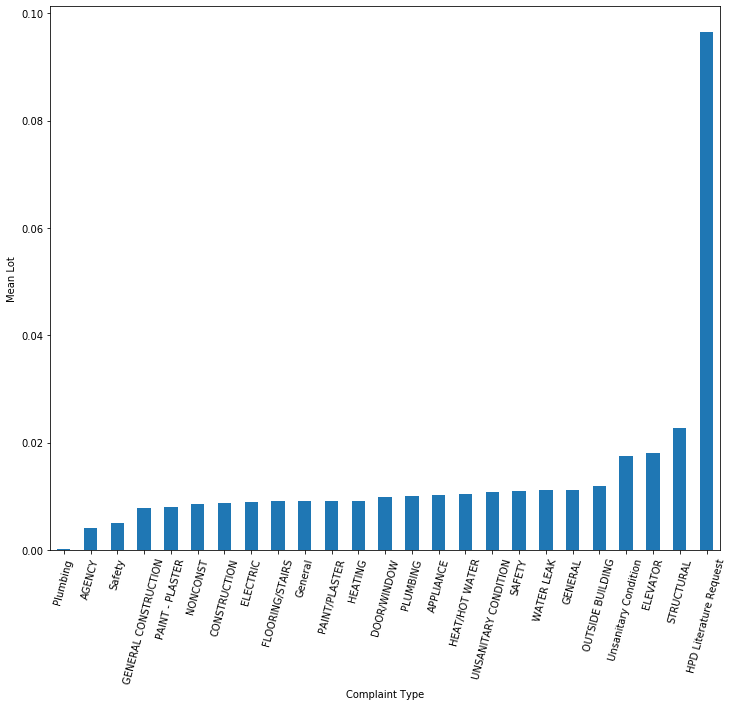

In [13]:
bar_mean_plot('Lot')

#### Obviously, lot has an obvious correlation with complaint types, we should check the other features

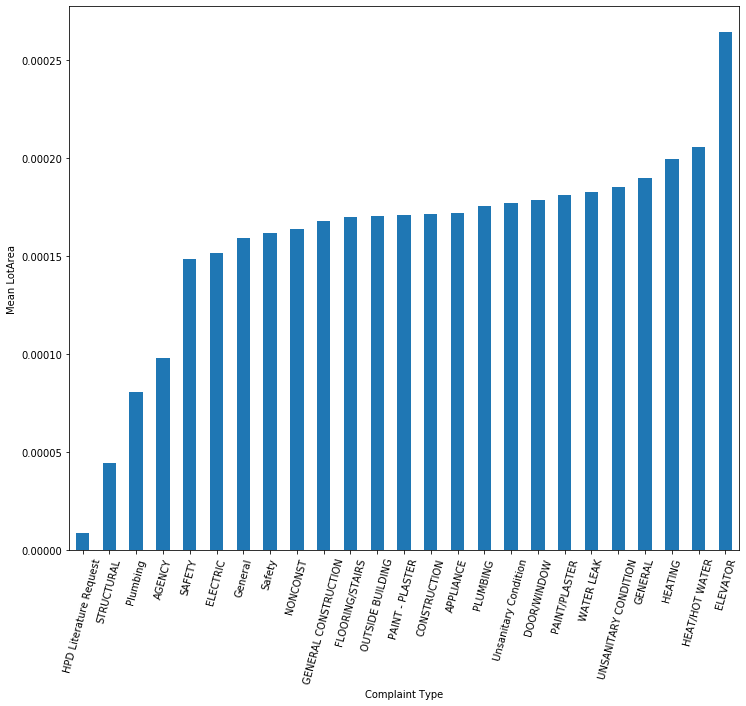

In [14]:
bar_mean_plot('LotArea')

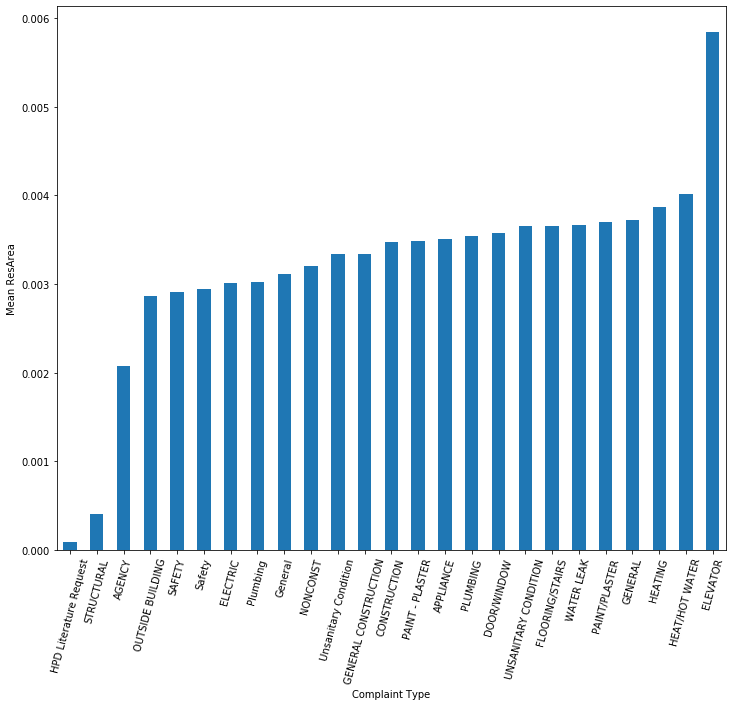

In [15]:
bar_mean_plot('ResArea')

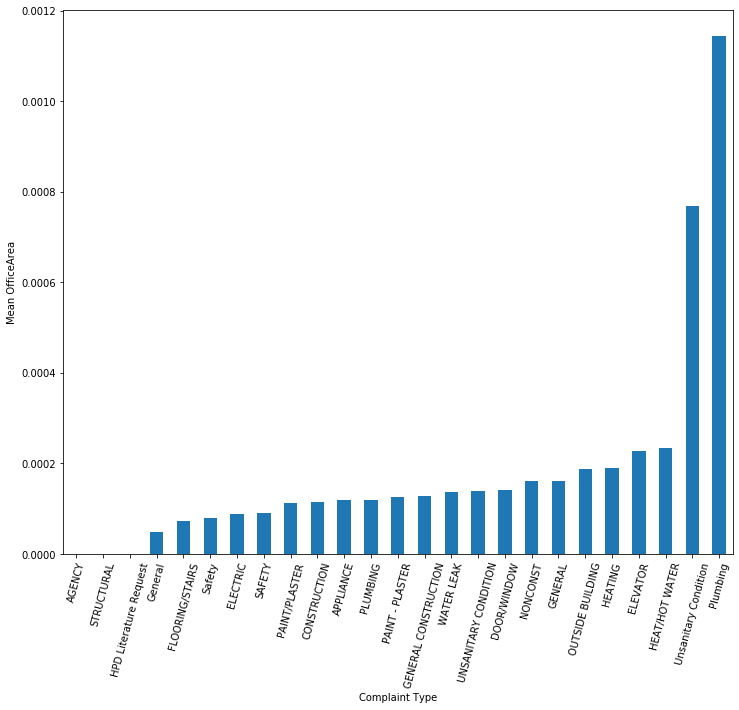

In [16]:
bar_mean_plot('OfficeArea')

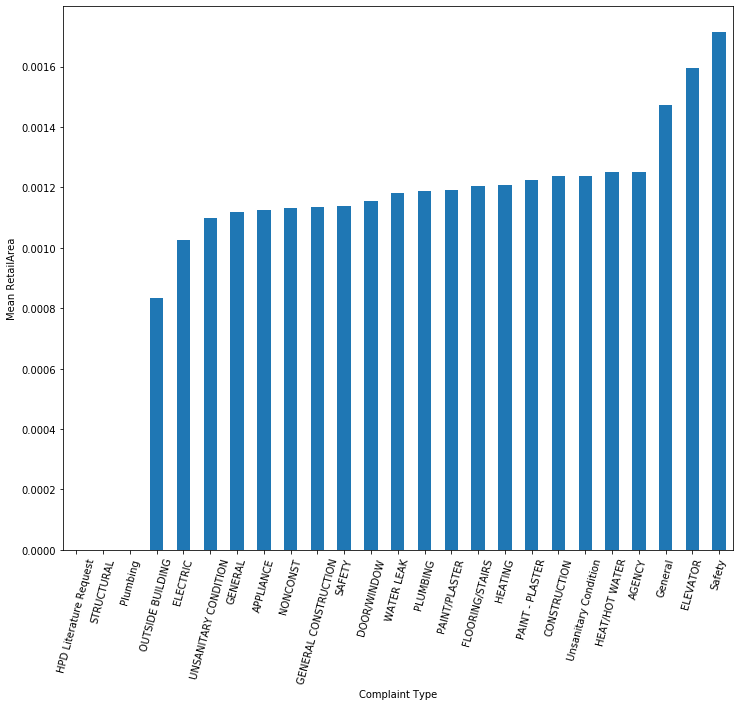

In [17]:
bar_mean_plot('RetailArea')

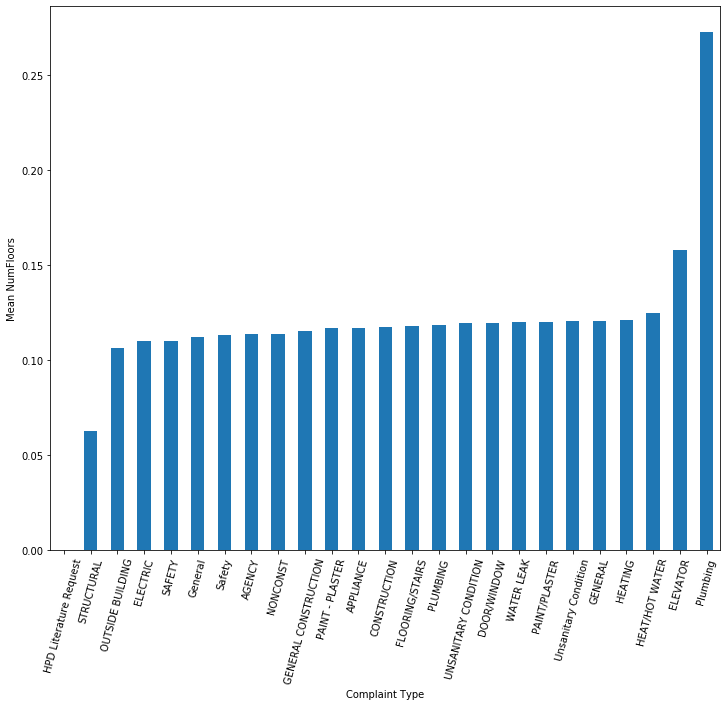

In [18]:
bar_mean_plot('NumFloors')

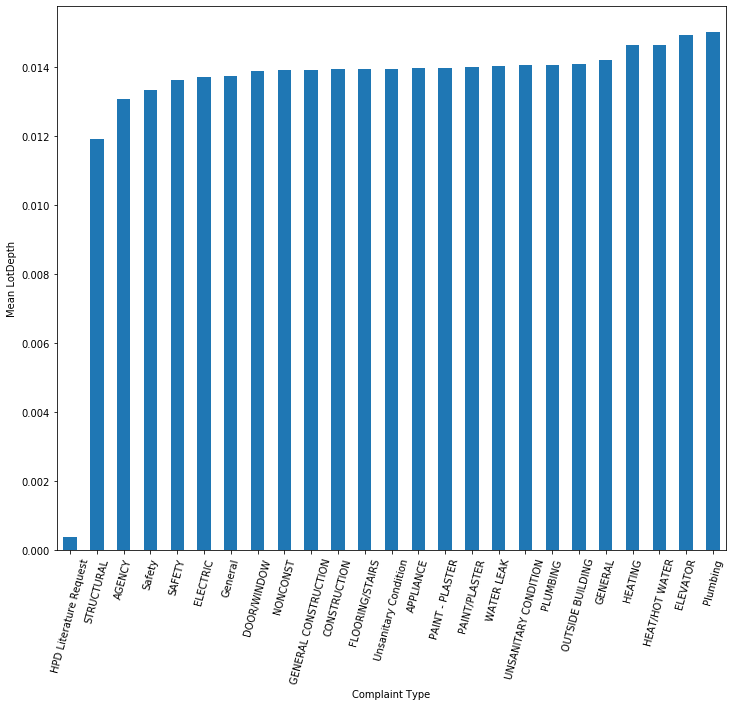

In [19]:
bar_mean_plot('LotDepth')

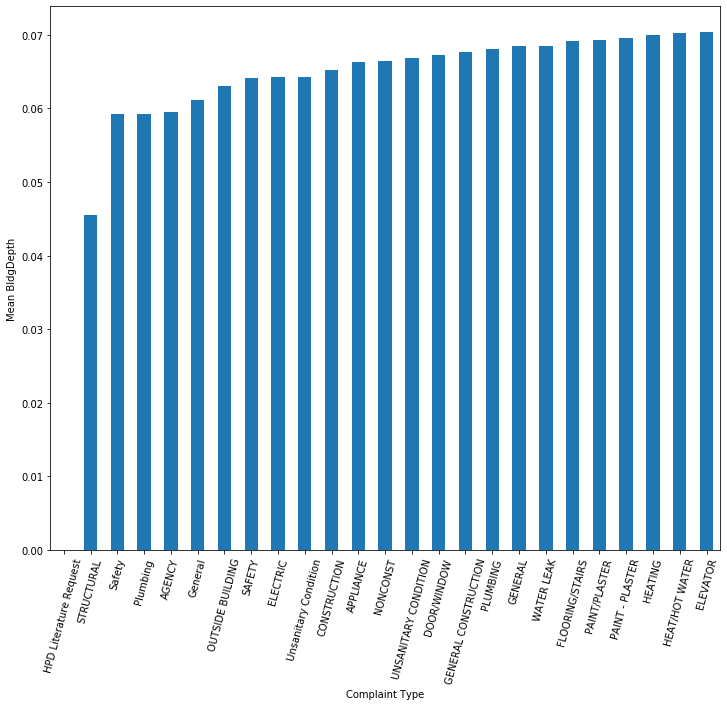

In [20]:
bar_mean_plot('BldgDepth')

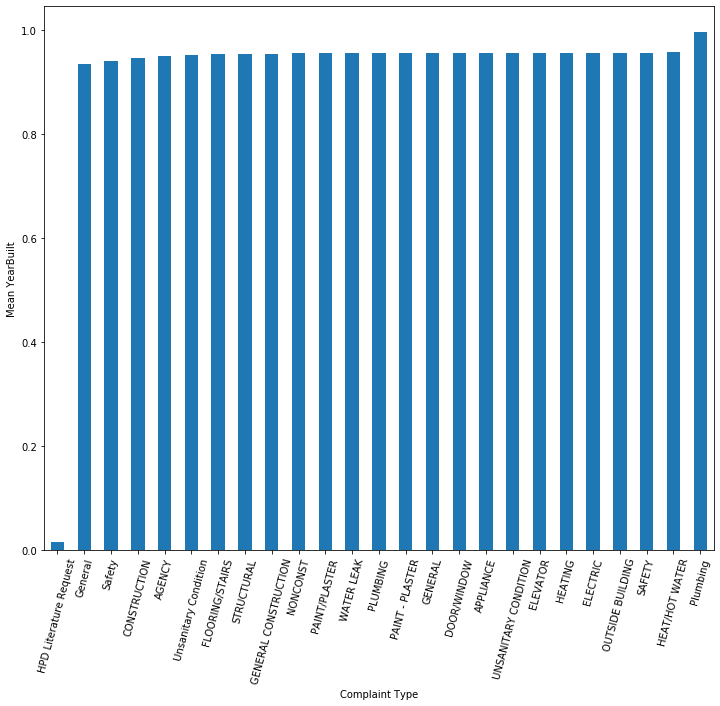

In [21]:
bar_mean_plot('YearBuilt')

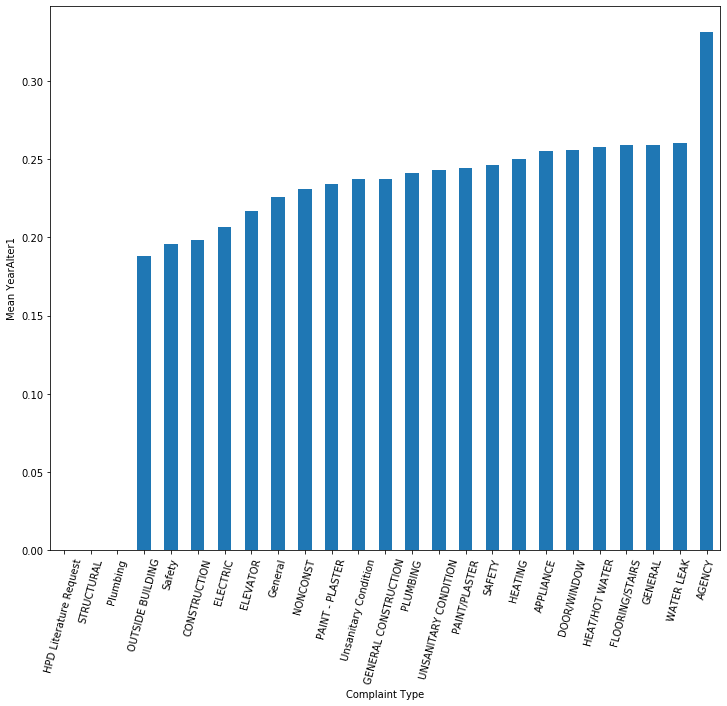

In [22]:
bar_mean_plot('YearAlter1')

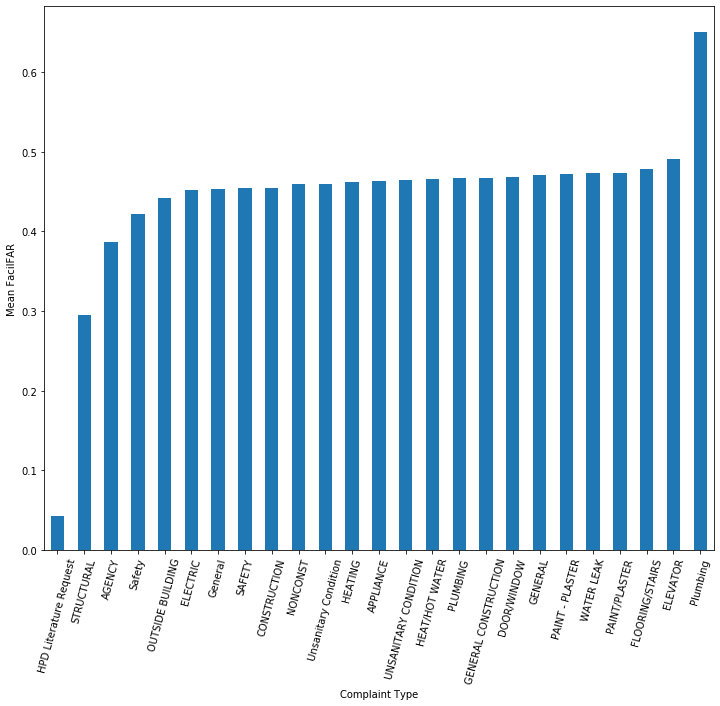

In [23]:
bar_mean_plot('FacilFAR')

### Based on the plots we can conclude that these housing features have a correlation with the number of complaints:

#### 1) Lot
#### 2) Lot Area
#### 3) ResArea
#### 4) Office Area
#### 5) Retail Area
#### 6) NumFloors
#### 7) YearAlter1

#### Note: As for the remaining features, there is no indication (based on the plots) that a correlation is in fact present

# Predictive Model

In [24]:
# The job of this section is to build a ML model that accurately predicts the number of Heat/Hot water complaints
# to expect in the future 


# We start by creating a time series that reflects the evolution of the number of complaints with time 
# We group this time series per month 

df_top_complaint['Created Date'] = pd.to_datetime(df_top_complaint['Created Date'])

time_ser_HH_compt = pd.Series(1, index = df_top_complaint['Created Date'])

time_ser_HH_compt = time_ser_HH_compt.resample('M').sum()

/Users/anthonymoubarak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


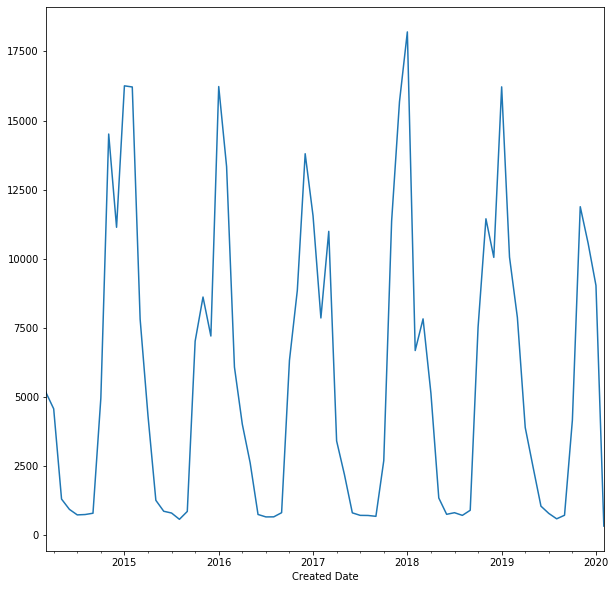

In [25]:
# Plotting the time series 

time_ser_HH_compt.plot(kind='line', figsize = (10,10))

### It is obvious from the plot that the data follows a periodic pattern, where heat and hot water problems are mostly prominent during the winter seasons, which makes a lot of sense.

In [26]:
# Next, we need to split our model into a train and a test set. The test set will be the last 11 entries in the df


Train_set =  time_ser_HH_compt[:len(time_ser_HH_compt)-11]
# keep the test set with real value
Test_set = time_ser_HH_compt[len(time_ser_HH_compt)-11:]

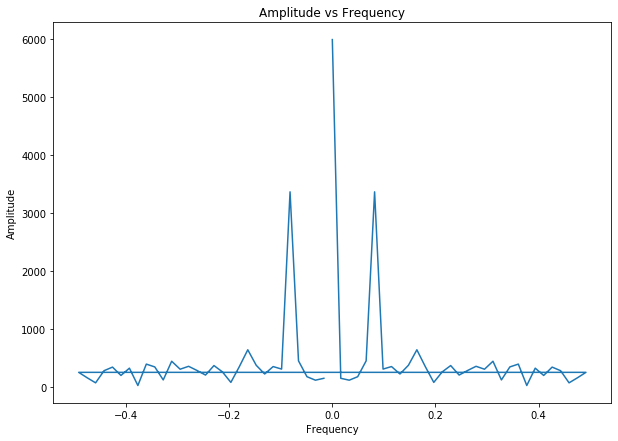

In [27]:
# Start with the FFT model (fourier transform)



# Number of trained data
N = len(Train_set)
# Do FFT
fft_Train_set = np.fft.fft(Train_set)
# Calculate the frequency
freq = np.fft.fftfreq(N)
# Calculate the amplitude
Amp = np.abs(fft_Train_set)/N
# Calculate the phase
Phase = np.angle(fft_Train_set)


plt.figure(figsize=(10,7))
plt.plot(freq, Amp)
plt.title('Amplitude vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

#### Filter the functions with these criteria:
#### Amplitude more than 3
#### Frequency between 0 and 0.3

In [28]:
# filtering amplitude, frequency and phase
filter_ = np.logical_or(np.logical_and(freq >= 0, freq < 0.3), Amp > 3)
filtered_freq = freq[filter_]
filtered_amp = Amp[filter_]
filtered_phase = Phase [filter_]

In [29]:
def func_model(x, amplitude, phase, freq):
    a = []
    for i in x:
        f = np.cos(2*np.pi*freq*i + phase)
        a.append(np.dot(amplitude, f))
    return np.array(a)

In [30]:
index_series = np.arange(48, 59, 1)
predictions1 = func_model(index_series, filtered_amp, filtered_phase, filtered_freq )

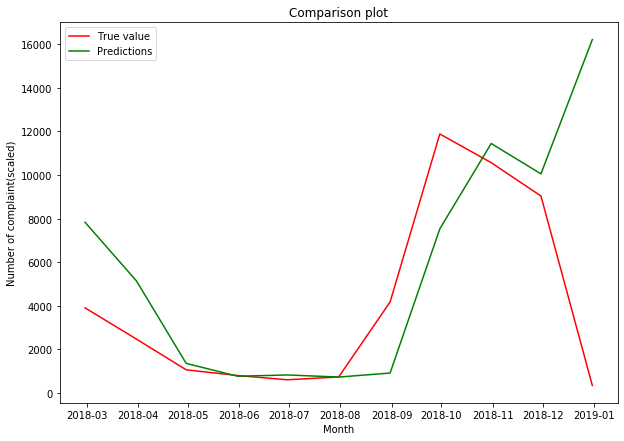

In [31]:
# Plotting model performance


predict_date_range = pd.date_range(start='2/1/2018', end='1/1/2019', freq='M')
plt.figure(figsize=(10,7))
plt.plot(predict_date_range, Test_set, color = 'r', label = 'True value')
plt.plot(predict_date_range, predictions1, color = 'g', label = 'Predictions')
plt.title('Comparison plot')
plt.xlabel('Month')
plt.ylabel('Number of complaint(scaled)')
plt.legend()
plt.show()

In [32]:
# calculate RMSE score
from sklearn.metrics import mean_squared_error
from math import sqrt

score =  sqrt(mean_squared_error(Test_set, predictions1))
print("FFT model score: ", score)

FFT model score:  5277.720005319095


In [33]:
# create SARIMA model

import statsmodels.api as sm


model = sm.tsa.statespace.SARIMAX(Train_set, order=(2,0,3), seasonal_order=(0,0,0,12), trend = 'c')
model_fit = model.fit()

In [34]:
# calculate predictions by the SARIMA model
predictions2 = model_fit.predict(start=48, end=58, dynamic=False)
# since it is imposible for the number of complaint to be negative, lets take the negative predictions into 0 
predictions2[predictions2 < 0] = 0

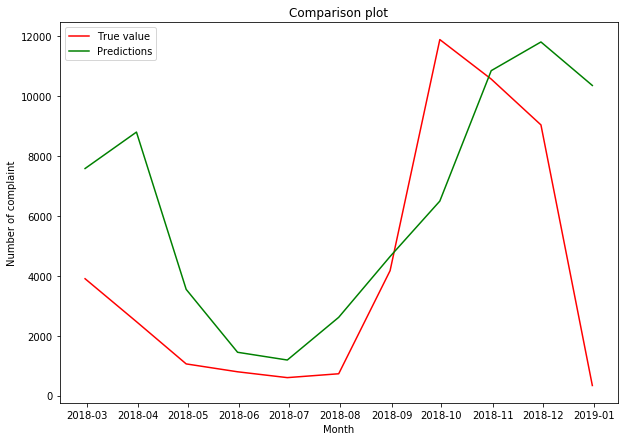

In [35]:
plt.figure(figsize=(10,7))
plt.plot(predict_date_range, Test_set, color = 'r', label = 'True value')
plt.plot(predict_date_range, predictions2, color = 'g', label = 'Predictions')
plt.title('Comparison plot')
plt.xlabel('Month')
plt.ylabel('Number of complaint')
plt.legend()
plt.show()

In [60]:
# SARIMA model performance

score2 = sqrt(mean_squared_error(Test_set, predictions2))
print('SARIMA model score: ', score2 )

SARIMA model score:  4279.889408409441


#### We can see that the model is an improvement from the previous model

In [44]:
# First, we need to prepare the data, so that it can be processed as an input for the LSTM layer by 
# change the data dimension into (n_sample, n_step, n_features) and separate it into train and test set.

# change data into np.array
data_series = time_ser_HH_compt.values

In [45]:
# Define a split sequence function to spilt the series into multiple series and its label/next number of the sequence.

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [46]:
# set the time step
n_steps = 10
#split the series into multiple sequence
X, y = split_sequence(data_series, n_steps)

In [47]:
# Split the sequences of data into train and test set
# As before, we take the last 11 data as the test set
X_train, y_train = X[:len(X)-11], y[:len(X)-11]
X_test, y_test = X[len(X)-11:], y[len(X)-11:]

In [48]:
# Reshape the dimension of train and test feature set into (n_sample, n_step, n_features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [40]:

# import the necessary library
from keras.models import Sequential  
from keras.layers import Dense, LSTM, Dropout  
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import statsmodels.api as sm
 


# define model
def TS_model():
    
    model = Sequential()  
    model.add(LSTM(units=50, input_shape=(n_steps, 1), activation = 'relu', return_sequences=True))  
    model.add(Dropout(0.1))
    
    model.add(LSTM(units=50, activation = 'relu'))  
    model.add(Dropout(0.1))
      
    model.add(Dense(units = 1))  
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [49]:
# set the callback functions
earlyStopping = EarlyStopping(monitor='val_loss', patience=500, verbose=0, mode='min')
mcp_save = ModelCheckpoint('lstm_time_series.hdf5', save_best_only=True, 
                           monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=200, verbose=1, min_delta=1e-4, mode='min')

In [50]:
# create model and do training
model = TS_model()
model.fit(X_train, y_train, epochs = 1000, validation_data = (X_test, y_test), 
          batch_size = 38, verbose = 2, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Train on 51 samples, validate on 11 samples
Epoch 1/1000
 - 3s - loss: 72718603.6078 - val_loss: 26909970.0000
Epoch 2/1000
 - 0s - loss: 66468373.1765 - val_loss: 27739892.0000
Epoch 3/1000
 - 0s - loss: 69431101.0196 - val_loss: 25971578.0000
Epoch 4/1000
 - 0s - loss: 65942658.9020 - val_loss: 22965576.0000
Epoch 5/1000
 - 0s - loss: 62039070.1961 - val_loss: 19763338.0000
Epoch 6/1000
 - 0s - loss: 62653058.7451 - val_loss: 21772696.0000
Epoch 7/1000
 - 0s - loss: 61854787.2941 - val_loss: 17473998.0000
Epoch 8/1000
 - 0s - loss: 54842093.4902 - val_loss: 18107534.0000
Epoch 9/1000
 - 0s - loss: 55929194.5098 - val_loss: 21686696.0000
Epoch 10/1000
 - 0s - loss: 53491421.0980 - val_loss: 23240376.0000
Epoch 11/1000
 - 0s - loss: 57126682.5882 - val_loss: 20763198.0000
Epoch 12/1000
 - 0s - loss: 53225597.3333 - val_loss: 20577556.0000
Epoch 13/1000
 - 0s - loss: 53824587.6863 - val_loss: 19743506.0000
Epoch 14/1000
 - 0s - loss: 56725732.3922 - val_loss: 23141986.0000
Epoch 15/1000

Epoch 121/1000
 - 0s - loss: 35188303.9608 - val_loss: 40077580.0000
Epoch 122/1000
 - 0s - loss: 35157398.9804 - val_loss: 46819020.0000
Epoch 123/1000
 - 0s - loss: 29552920.3922 - val_loss: 40022544.0000
Epoch 124/1000
 - 0s - loss: 31796607.6078 - val_loss: 29226754.0000
Epoch 125/1000
 - 0s - loss: 33201036.8627 - val_loss: 25979116.0000
Epoch 126/1000
 - 0s - loss: 34619947.2941 - val_loss: 20671066.0000
Epoch 127/1000
 - 0s - loss: 30398062.9804 - val_loss: 16824994.0000
Epoch 128/1000
 - 0s - loss: 29903907.1373 - val_loss: 23896240.0000
Epoch 129/1000
 - 0s - loss: 27990833.3725 - val_loss: 24949100.0000
Epoch 130/1000
 - 0s - loss: 27689563.8431 - val_loss: 26092174.0000
Epoch 131/1000
 - 0s - loss: 27968618.1176 - val_loss: 27238334.0000
Epoch 132/1000
 - 0s - loss: 30690740.8235 - val_loss: 25787368.0000
Epoch 133/1000
 - 0s - loss: 27739550.4314 - val_loss: 25648120.0000
Epoch 134/1000
 - 0s - loss: 32244879.6863 - val_loss: 30939230.0000
Epoch 135/1000
 - 0s - loss: 29145

Epoch 240/1000
 - 0s - loss: 26392194.0392 - val_loss: 14854745.0000
Epoch 241/1000
 - 0s - loss: 32573153.5686 - val_loss: 18732786.0000
Epoch 242/1000
 - 0s - loss: 27228146.2353 - val_loss: 24220644.0000
Epoch 243/1000
 - 0s - loss: 26617043.4510 - val_loss: 26992248.0000
Epoch 244/1000
 - 0s - loss: 27921657.4902 - val_loss: 21599308.0000
Epoch 245/1000
 - 0s - loss: 29777318.6667 - val_loss: 22114518.0000
Epoch 246/1000
 - 0s - loss: 32022023.3333 - val_loss: 20352428.0000
Epoch 247/1000
 - 0s - loss: 28084168.7843 - val_loss: 18772886.0000
Epoch 248/1000
 - 0s - loss: 32263792.4706 - val_loss: 21084104.0000
Epoch 249/1000
 - 0s - loss: 30889834.3529 - val_loss: 16192204.0000
Epoch 250/1000
 - 0s - loss: 27965180.7059 - val_loss: 16727117.0000
Epoch 251/1000
 - 0s - loss: 31639770.0392 - val_loss: 14873063.0000
Epoch 252/1000
 - 0s - loss: 27645132.3922 - val_loss: 13243705.0000
Epoch 253/1000
 - 0s - loss: 32764950.1961 - val_loss: 11945162.0000
Epoch 254/1000
 - 0s - loss: 32509

Epoch 359/1000
 - 0s - loss: 21679697.3333 - val_loss: 11175097.0000
Epoch 360/1000
 - 0s - loss: 16675564.8627 - val_loss: 11310119.0000
Epoch 361/1000
 - 0s - loss: 16698217.5294 - val_loss: 11585164.0000
Epoch 362/1000
 - 0s - loss: 21377406.1569 - val_loss: 11215912.0000
Epoch 363/1000
 - 0s - loss: 15437323.2941 - val_loss: 13706977.0000
Epoch 364/1000
 - 0s - loss: 17731247.9608 - val_loss: 13295802.0000
Epoch 365/1000
 - 0s - loss: 12043839.2941 - val_loss: 12383847.0000
Epoch 366/1000
 - 0s - loss: 12078704.8824 - val_loss: 12300282.0000
Epoch 367/1000
 - 0s - loss: 11591463.8824 - val_loss: 12216358.0000

Epoch 00367: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 368/1000
 - 0s - loss: 19254734.2745 - val_loss: 14099521.0000
Epoch 369/1000
 - 0s - loss: 15729407.4510 - val_loss: 14266916.0000
Epoch 370/1000
 - 0s - loss: 16926002.0588 - val_loss: 13964732.0000
Epoch 371/1000
 - 0s - loss: 14251164.8431 - val_loss: 14054007.0000
Epoch 372/1000
 - 0s 

Epoch 477/1000
 - 0s - loss: 18680246.2745 - val_loss: 15100570.0000
Epoch 478/1000
 - 0s - loss: 11376815.1275 - val_loss: 15104660.0000
Epoch 479/1000
 - 0s - loss: 16423288.9412 - val_loss: 14634404.0000
Epoch 480/1000
 - 0s - loss: 16438622.5098 - val_loss: 13133193.0000
Epoch 481/1000
 - 0s - loss: 13719067.5098 - val_loss: 13824111.0000
Epoch 482/1000
 - 0s - loss: 14795103.0588 - val_loss: 14433743.0000
Epoch 483/1000
 - 0s - loss: 15619318.7647 - val_loss: 14015025.0000
Epoch 484/1000
 - 0s - loss: 13445867.4902 - val_loss: 13174560.0000
Epoch 485/1000
 - 0s - loss: 17470956.6667 - val_loss: 12825071.0000
Epoch 486/1000
 - 0s - loss: 14258822.0000 - val_loss: 12194419.0000
Epoch 487/1000
 - 0s - loss: 16158223.4902 - val_loss: 12120633.0000
Epoch 488/1000
 - 0s - loss: 15430565.0588 - val_loss: 12120212.0000
Epoch 489/1000
 - 0s - loss: 15093207.2157 - val_loss: 12112527.0000
Epoch 490/1000
 - 0s - loss: 15335155.7255 - val_loss: 12185980.0000
Epoch 491/1000
 - 0s - loss: 14765

Epoch 596/1000
 - 0s - loss: 13843420.4706 - val_loss: 18356730.0000
Epoch 597/1000
 - 0s - loss: 13030869.2157 - val_loss: 16819912.0000
Epoch 598/1000
 - 0s - loss: 15836250.1765 - val_loss: 16844854.0000
Epoch 599/1000
 - 0s - loss: 14132281.1176 - val_loss: 16859064.0000
Epoch 600/1000
 - 0s - loss: 15493514.4706 - val_loss: 16869458.0000
Epoch 601/1000
 - 0s - loss: 14099281.9608 - val_loss: 16003168.0000
Epoch 602/1000
 - 0s - loss: 13758432.5098 - val_loss: 15955788.0000
Epoch 603/1000
 - 0s - loss: 12544757.1765 - val_loss: 16419916.0000
Epoch 604/1000
 - 0s - loss: 11059414.3922 - val_loss: 15855375.0000
Epoch 605/1000
 - 0s - loss: 18968849.3333 - val_loss: 15976355.0000
Epoch 606/1000
 - 0s - loss: 12988353.7255 - val_loss: 15950371.0000
Epoch 607/1000
 - 0s - loss: 15794815.2745 - val_loss: 16221754.0000
Epoch 608/1000
 - 0s - loss: 12450249.2549 - val_loss: 16221568.0000
Epoch 609/1000
 - 0s - loss: 16242237.4510 - val_loss: 16049428.0000
Epoch 610/1000
 - 0s - loss: 99430

Epoch 714/1000
 - 0s - loss: 12569418.3922 - val_loss: 11088072.0000
Epoch 715/1000
 - 0s - loss: 10586140.0000 - val_loss: 11089404.0000
Epoch 716/1000
 - 0s - loss: 14924628.6863 - val_loss: 11269325.0000
Epoch 717/1000
 - 0s - loss: 12058408.2157 - val_loss: 10798685.0000
Epoch 718/1000
 - 0s - loss: 14498694.2745 - val_loss: 10791916.0000
Epoch 719/1000
 - 0s - loss: 12529107.8039 - val_loss: 10787089.0000
Epoch 720/1000
 - 0s - loss: 12265267.8431 - val_loss: 10781882.0000
Epoch 721/1000
 - 0s - loss: 9728858.1569 - val_loss: 10778144.0000
Epoch 722/1000
 - 0s - loss: 13613012.5686 - val_loss: 10779141.0000
Epoch 723/1000
 - 0s - loss: 9696476.6863 - val_loss: 10779041.0000
Epoch 724/1000
 - 0s - loss: 12754634.1471 - val_loss: 10789473.0000
Epoch 725/1000
 - 0s - loss: 12172032.4706 - val_loss: 10819439.0000
Epoch 726/1000
 - 0s - loss: 10730803.2157 - val_loss: 10897489.0000
Epoch 727/1000
 - 0s - loss: 11159890.4118 - val_loss: 10992716.0000
Epoch 728/1000
 - 0s - loss: 1372576

Epoch 834/1000
 - 0s - loss: 12737814.6667 - val_loss: 10215796.0000
Epoch 835/1000
 - 0s - loss: 13967542.2941 - val_loss: 10214417.0000
Epoch 836/1000
 - 0s - loss: 10062652.2451 - val_loss: 10213168.0000
Epoch 837/1000
 - 0s - loss: 13477844.7451 - val_loss: 10212220.0000
Epoch 838/1000
 - 0s - loss: 10686257.9020 - val_loss: 10211139.0000
Epoch 839/1000
 - 0s - loss: 15300699.5882 - val_loss: 10210849.0000
Epoch 840/1000
 - 0s - loss: 12543539.4314 - val_loss: 10211358.0000
Epoch 841/1000
 - 0s - loss: 13326087.8039 - val_loss: 10210713.0000
Epoch 842/1000
 - 0s - loss: 11028094.1373 - val_loss: 10206684.0000
Epoch 843/1000
 - 0s - loss: 14688836.7843 - val_loss: 10202384.0000
Epoch 844/1000
 - 0s - loss: 12824149.0392 - val_loss: 10198243.0000
Epoch 845/1000
 - 0s - loss: 12647156.7451 - val_loss: 10194316.0000
Epoch 846/1000
 - 0s - loss: 10424278.5098 - val_loss: 10190288.0000
Epoch 847/1000
 - 0s - loss: 14380784.3431 - val_loss: 10183324.0000
Epoch 848/1000
 - 0s - loss: 88171

 - 0s - loss: 12286584.7451 - val_loss: 8916009.0000
Epoch 954/1000
 - 0s - loss: 8793509.8922 - val_loss: 8915840.0000
Epoch 955/1000
 - 0s - loss: 11608887.5294 - val_loss: 8915665.0000
Epoch 956/1000
 - 0s - loss: 15537911.0196 - val_loss: 8915519.0000
Epoch 957/1000
 - 0s - loss: 13146860.4510 - val_loss: 8915391.0000
Epoch 958/1000
 - 0s - loss: 11276240.9412 - val_loss: 8914999.0000
Epoch 959/1000
 - 0s - loss: 16412569.3529 - val_loss: 8914667.0000
Epoch 960/1000
 - 0s - loss: 8273189.3529 - val_loss: 8914396.0000
Epoch 961/1000
 - 0s - loss: 14229378.6078 - val_loss: 8914189.0000
Epoch 962/1000
 - 0s - loss: 8961359.6667 - val_loss: 8914022.0000
Epoch 963/1000
 - 0s - loss: 8971167.6961 - val_loss: 8913869.0000
Epoch 964/1000
 - 0s - loss: 10282022.3824 - val_loss: 8913756.0000
Epoch 965/1000
 - 0s - loss: 12999620.0196 - val_loss: 8913676.0000
Epoch 966/1000
 - 0s - loss: 9756639.7451 - val_loss: 8913606.0000
Epoch 967/1000
 - 0s - loss: 10288428.4706 - val_loss: 8913536.0000


In [51]:
from keras.models import load_model
best_model = load_model('lstm_time_series.hdf5')

In [54]:
# make predictions
one_predictions3 = best_model.predict(X_test)
# convert the negative predictions into 0 
one_predictions3[one_predictions3 < 0] = 0


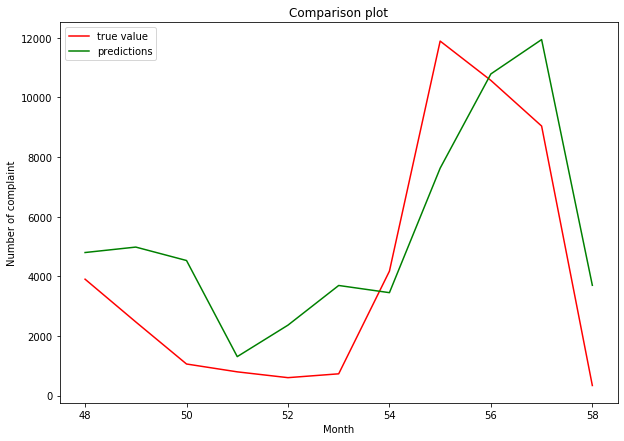

In [56]:
# Plot the real vs predicted


index_series3 = np.arange(48, 59, 1)
plt.figure(figsize=(10,7))
plt.plot(index_series3, Test_set, color = 'r', label = 'true value')
plt.plot(index_series3, one_predictions3, color = 'g', label = 'predictions')
plt.title('Comparison plot')
plt.xlabel('Month')
plt.ylabel('Number of complaint')
plt.legend()
plt.show()

In [61]:
# LSTM score

score3 = sqrt(mean_squared_error(Test_set, one_predictions3))
print('One time step LSTM score: ', score3 )

One time step LSTM score:  2517.3454828330027


In [63]:
# Summarize results 

results = {'Model' : ['FFT' , 'SARIMA' , 'LSTM']  , 'Error': [score , score2, score3]}
results_df = pd.DataFrame(results)

results_df

,Model,Error
0,FFT,4279.889408
1,SARIMA,4279.889408
2,LSTM,2517.345483


## Conclusion: The LSTM gives us the smallest error, hence being the best model